In [2]:
import sympy
from sympy import Eq, S, Matrix, symbols, Symbol, simplify, expand, collect, solve, solveset, zeros, ones
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy import sqrt
from sympy.plotting.plot import plot3d
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 17
# Алгебра
## Поверхности второго порядка
### Задание 1.
Составить в матричном виде двумя способами уравнение поверхности второго порядка $4x^2-24xy+8\sqrt3 xz-7y^2+10\sqrt3 yz+3z^2-4 = 0$. Привести уравнение поверхности второго порядка к каноническому виду с помощью перехода к новому базису. Вывести на экран каноническое уравнение.

------------- Классная работа -------------       
Записать уравнение поверхности второго порядка $x^2-2y^2-z^2+2xy+4xz+6x-8y+4z-12=0$ в матричном виде двумя способами.
Вначале построим матрицу $A$ квадратичной формы, входящей в уравнение, и вектор $b$: $$
A=\left(\begin{matrix}1&1&2\\1&-2&0\\2&0&-1\end{matrix}\right),\quad b=\left(\begin{matrix}3&-4&2\end{matrix}\right) $$ Проверим, что эта
матрица задает нашу поверхность второго порядка, для этого вычислим $$ X^TAX+2bX+c,\quad
X=\left(\begin{matrix}x\\y\\z\end{matrix}\right), \quad c=-12 $$

$\displaystyle \left[\begin{matrix}1 & 1 & 2\\1 & -2 & 0\\2 & 0 & -1\end{matrix}\right]$
$\displaystyle \left[\begin{matrix}x \left(x + y + 2 z\right) + y \left(x - 2 y\right) + z \left(2 x - z\right)\end{matrix}\right]$
$\displaystyle \left[\begin{matrix}3 x - 4 y + 2 z\end{matrix}\right]$
$\displaystyle x^{2} + 2 x y + 4 x z + 6 x - 2 y^{2} - 8 y - z^{2} + 4 z - 12 = 0$

Теперь составим расширенную матрицу $A_1$ и проверим, что получилось то же самое уравнение:
$\displaystyle \left[\begin{matrix}1 & 1 & 2 & 3\\1 & -2 & 0 & -4\\2 & 0 & -1 & 2\\3 & -4 & 2 & -12\end{matrix}\right]$
$\displaystyle x^{2} + 2 x y + 4 x z + 6 x - 2 y^{2} - 8 y - z^{2} + 4 z - 12 = 0$


In [18]:
x, y, z = symbols('x y z')
A = Matrix(((4, -12, 4*sqrt(3)), (-12, -7, 5*sqrt(3)), (4*sqrt(3), 5*sqrt(3), 3)))
A1 = Matrix(((4, -12, 4*sqrt(3), 0), (-12, -7, 5*sqrt(3), 0), (4*sqrt(3), 5*sqrt(3), 3, 0), (0, 0, 0, -4)))
display("Вид матрицы 1", A, "Вид матрицы 2", A1)

# Создание и нормализация собственных векторов
X = Matrix((x, y, z))
P = Matrix([])
for item in A.eigenvects():
    for i in range(item[1]):
        P = P.row_join(item[2][i].normalized())

# Каноничсекое уравнение
canonic_matrix = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
canonic_eq = simplify(expand(X_new.T*canonic_matrix*X_new))[0]
display("Каноничсекое уравнение", Eq(canonic_eq - 4, 0))

'Вид матрицы 1'

Matrix([
[        4,       -12, 4*sqrt(3)],
[      -12,        -7, 5*sqrt(3)],
[4*sqrt(3), 5*sqrt(3),         3]])

'Вид матрицы 2'

Matrix([
[        4,       -12, 4*sqrt(3),  0],
[      -12,        -7, 5*sqrt(3),  0],
[4*sqrt(3), 5*sqrt(3),         3,  0],
[        0,         0,         0, -4]])

'Каноничсекое уравнение'

Eq(-20*x1**2 + 8*y1**2 + 12*z1**2 - 4, 0)

### Задание 2.
Привести уравнение поверхности второго порядка $24 x^{2} - 4 \sqrt{2} x y - 4 \sqrt{2} x z + 18 y^{2} + 12 y z + 18 z^{2} - 4 = 0$ к каноническому виду. Построить график.

'Каноничсекое уравнение'

Eq(12*x1**2 + 20*y1**2 + 28*z1**2 - 4, 0)

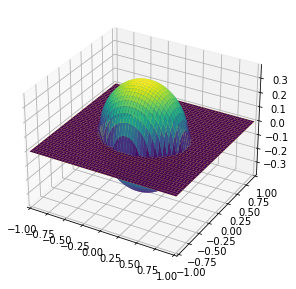

In [4]:
# Создание и нормализация собственных векторов
x, y, z = symbols('x y z')
A = Matrix(((24, -2*sqrt(2), -2*sqrt(2)), (-2*sqrt(2), 18, 6), (-2*sqrt(2), 6, 18)))
X = Matrix((x, y, z))
P = Matrix([])
for item in A.eigenvects():
    for i in range(item[1]):
        P = P.row_join(item[2][i].normalized())

# Каноничсекое уравнение
canonic_matrix = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
canonic_eq = simplify(expand(X_new.T*canonic_matrix*X_new))[0]
display("Каноничсекое уравнение", Eq(canonic_eq - 4, 0))

# График
canonic_eq2 = Eq(canonic_eq/4, 1)
plot3d(*solve(canonic_eq2, z1), (x1, -1, 1), (y1, -1, 1))

### Задание 3.
Привести уравнение поверхности второго порядка $x^2 + y^2 + 2x - 4y + 2z + 1 = 0$ к каноническому виду. Построить график.

'Каноничсекое уравнение'

Eq(y1**2 + z1**2 + 1, 0)

'Свободный член'

-5

'Новое уравнение'

Eq(y2**2 + 2*y2 + z2**2 - 5, 0)

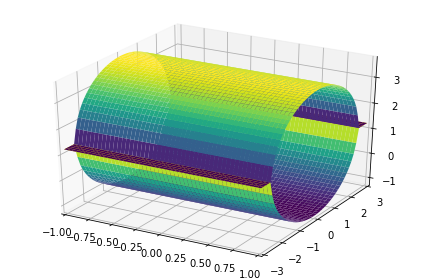

In [56]:
# Создание и нормализация собственных векторов
x, y, z = symbols('x y z')
A = Matrix(((1, 0, 0), (0, 1, 0), (0, 0, 0)))
X = Matrix((x, y, z))
P = Matrix([])
for item in A.eigenvects():
    for i in range(item[1]):
        P = P.row_join(item[2][i].normalized())

# Каноничсекое уравнение
canonic_matrix = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
canonic_eq = simplify(expand(X_new.T*canonic_matrix*X_new))[0]
display("Каноничсекое уравнение", Eq(canonic_eq + 1, 0))

# Пересчитаем вектор коэффициентов линейной формы
b = Matrix((1, 0, 0))
b_new = P.T*b
u_new = canonic_eq + 2*(b_new.T*X_new)[0]

# Пересчитаем свободный член
c_new = -5
c_new -= b_new[2]**2/(canonic_matrix[2, 2])
display("Свободный член", c_new)

# Получис новое уравнение
b_last = b_new
b_last[2] = 0
x2, y2, z2 = symbols('x2 y2 z2')
X4_last = Matrix((x2, y2, z2))
eq4 = Eq((X4_last.T*canonic_matrix*X4_last)[0] + 2*(b_last.T*X4_last)[0] + c_new, 0)
display("Новое уравнение", eq4)

# Решим уравнение и нарисуем график
Z = solve(eq4, z2**2)
y3 = Symbol('y3')
eq4 = Eq(z2**2, simplify(expand(Z[0].subs(y2, y3 - 5**S.Half))))
Y = solve(eq4, y3)
plot3d(*Y, (x2, -1, 1), (z2, -3, 3))

### Индивидуальное задание.
Привести уравнение поверхности второго порядка к каноническому виду. Построить график.

'Каноничсекое уравнение'

Eq(20*x1**2 + 40*y1**2 + 60*z1**2, 0)

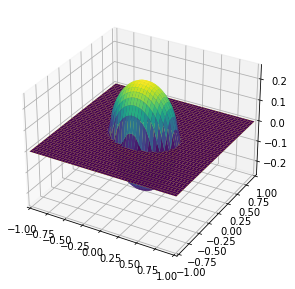

In [6]:
# Создание и нормализация собственных векторов
x, y, z = symbols('x y z')

A = Matrix(((25, 5*sqrt(3), 0), (5*sqrt(3), 35, 0), (0, 0, 60)))

# 25x**2 + 10sqrt(3)xy + 35y**2+60z**2

X = Matrix((x, y, z))
P = Matrix([])
for item in A.eigenvects():
    for i in range(item[1]):
        P = P.row_join(item[2][i].normalized())

# Каноничсекое уравнение
canonic_matrix = P.T*A*P
x1, y1, z1 = symbols('x1 y1 z1')
X_new = Matrix((x1, y1, z1))
canonic_eq = simplify(expand(X_new.T*canonic_matrix*X_new))[0]
display("Каноничсекое уравнение", Eq(canonic_eq, 0))

# График
canonic_eq2 = Eq(canonic_eq/4, 1)
plot3d(*solve(canonic_eq2, z1), (x1, -1, 1), (y1, -1, 1))